In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Reading csv into dataframe
df = pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Separating target and features
y = df.MYOPIC.values
X = df.drop('MYOPIC', axis=1).values

In [4]:
# Standardizing dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Applying PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(618, 10)

In [7]:
# Applying tSNE
tsne = TSNE(learning_rate=100)
X_tsne = tsne.fit_transform(X_pca)
X_tsne.shape

(618, 2)

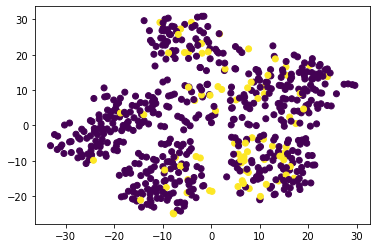

In [8]:
# Plotting tSNE output
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.show()

In [10]:
# Cluster analysis using K-means, creating potential inertias for each k value
import warnings
warnings.filterwarnings('ignore')

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i)
    km.fit(X_tsne)
    inertia.append(km.inertia_)

elbow_data = {'k':k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,250226.625000
1,2,142111.390625
2,3,86223.468750
3,4,58103.445312
4,5,38712.683594


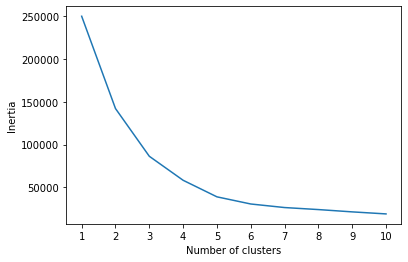

In [11]:
# Plotting for elbow curves
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## From the analysis done, the patients can be clustered together.
## When plotting the tSNE output, the plots that appear appear to branch out into five directions.
## Also, according to the plot of k-means, 5 clusters is the optimal amount of clusters.